# Содержание
    
[Описание проекта](#project)

1. [Загрузка данных и их подготовка к исследованию](#start)

    1.1. [Откроем файл с данными и изучим общую информацию.](#start1)

    1.2. [Подготовка данных.](#start2)
    
2.  [Исследовательский анализ данных.](#analysis)

    2.1. [Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?](#analysis1)

    2.2. [Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?](#analysis2)

    2.3. [Возьмите данные за соответствующий актуальный период.](#analysis3)
    
    2.4. [Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.](#analysis4)
    
    2.5. [Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.](#analysis5)
        
    2.6. [Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.](#analysis6)
        
    2.7. [Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?](#analysis7)
    
3. [Составим портрет пользователя каждого региона.](#portrait)

    3.1. [Определите для пользователя каждого региона (NA, EU, JP) самые популярные платформы (топ-5). Опишите различия в долях продаж.](#portrait1)
 
    3.2. [Определите для пользователя каждого региона (NA, EU, JP) самые популярные жанры (топ-5). Поясните разницу.](#portrait2)

    3.3. [Влияет ли рейтинг ESRB на продажи в отдельном регионе?](#portrait3)

4. [Проверка гипотез.](#hypotheses)

    4.1. [Проверка гипотезы: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.](#hypotheses1)

    4.2. [Проверка гипотезы: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.](#hypotheses2)
    
5. [Выводы и рекомендации по исследованию.](#rec)

<a id="project"></a>
# Описание проекта

Интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).

**Цель исследования** - выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Данные:** https://code.s3.yandex.net/datasets/games.csv

**Описание данных**
- `'Name'` — название игры
- `'Platform'` — платформа
- `'Year_of_Release'` — год выпуска
- `'Genre'` — жанр игры
- `'NA_sales'` — продажи в Северной Америке (миллионы проданных копий)
- `'EU_sales'` — продажи в Европе (миллионы проданных копий)
- `'JP_sales'` — продажи в Японии (миллионы проданных копий)
- `'Other_sales'` — продажи в других странах (миллионы проданных копий)
- `'Critic_Score'` — оценка критиков (максимум 100)
- `'User_Score'` — оценка пользователей (максимум 10)
- `'Rating'` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

<a id="start"></a> 
### Загрузка данных и их подготовка к исследованию

<a id="start1"></a>
#### Откроем файл с данными и изучим общую информацию. 

Импорт необходимых для работы библиотек.

In [1]:
import pandas as pd
import matplotlib
import seaborn as sns
sns.set_theme(style='whitegrid')
sns.color_palette()

import matplotlib.pyplot as plt
#код, который выводит все колонки таблицы
pd.set_option('display.max_columns', None)  
#код отображает float с двумя знаками после точки
pd.options.display.float_format = '{:.2f}'.format
import numpy as np
from string import ascii_letters

import warnings
warnings.simplefilter("ignore")

from IPython.display import display_html#библиотеки, использовались для вывода сразу нескольких доблиц в строке
from ipywidgets import widgets, Layout#

from scipy import stats as st

Открытие файла с данными и изучение общей информации.

In [2]:
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [3]:
def information_df(metod):
    print('Ознакомимся с таблицей, для этого выведем первые 20 строк датафрейма data на экран.')
    display(metod.head(21))
    print(' ')    
    print('Выведем основную информацию о датафрейме с помощью метода info().')
    display(metod.info())
    print(' ')
    print ('Количество явных дубликатов:', metod.duplicated().sum())
    print(' ')
    print('Ознакомимся с первоначальными данными методом describe().')
    plt.show()
    display(metod.describe())
      
information_df(data)

Ознакомимся с таблицей, для этого выведем первые 20 строк датафрейма data на экран.


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.00,Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,1985.00,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.00,Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,2009.00,Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.00,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.00,Platform,11.28,9.14,6.50,2.88,89.00,8.5,E
7,Wii Play,Wii,2006.00,Misc,13.96,9.18,2.93,2.84,58.00,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.00,Platform,14.44,6.94,4.70,2.24,87.00,8.4,E
9,Duck Hunt,NES,1984.00,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


 
Выведем основную информацию о датафрейме с помощью метода info().
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

 
Количество явных дубликатов: 0
 
Ознакомимся с первоначальными данными методом describe().


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.00,16715.00,16715.00,16715.00,16715.00,8137.00
mean,2006.48,0.26,0.15,0.08,0.05,68.97
std,5.88,0.81,0.50,0.31,0.19,13.94
min,1980.00,0.00,0.00,0.00,0.00,13.00
25%,2003.00,0.00,0.00,0.00,0.00,60.00
50%,2007.00,0.08,0.02,0.00,0.01,71.00
75%,2010.00,0.24,0.11,0.04,0.03,79.00
max,2016.00,41.36,28.96,10.22,10.57,98.00


In [4]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

***Рассмотрев исходные данные, можно выделить:*** 

- в таблице 11 столбцов с различными типами данных, а также в столбцах `'Year_of_Release'` и `'User_Score'` необходимо будет изменить тип данных;

- более чем, в половине столбцов имеются пропущенные значения, наибольшее количество пропусков в столбцах с оценками и рейтингом: `'Critic_Score'`, `'User_Score'`, `'Rating'`;

- в названиях столбцов видны нарушения стиля (строчные буквы сочетаются с прописными).

<a id="start2"></a>
#### Подготовка данных.

**Заменим названия столбцов (приведем к нижнему регистру).**

In [5]:
data.columns = data.columns.str.lower()

**Преобразуем данные в нужные типы.**

In [6]:
len(data.query('user_score.isna()'))#проверим количество пропущенных значений столбца user_score до изменения типа данных

6701

In [7]:
data['year_of_release'] = pd.to_numeric(data['year_of_release'], errors='coerce').astype('Int64')
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce').astype('float64')

Для дальнейшей работы над датафреймом необходимо изменить тип данных в некоторых столбцах:

• в столбце 'user_score' был изменен тип данных на float для удобства при дальнейшего использования данных, построения графиков и таблиц;

• в столбцах 'year_of_release' был изменен формат данных на int, так как значения, содержащиеся в столбцах относятся к целым числам, для удобства лучше их перевести в этот тип.

In [8]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

**Обработайте пропуски при необходимости.**


В данных имеются пропущенные значения в 6 столбцах. 

Количество пропусков в столбцах 'name', 'year_of_release', 'genre' небольшое, поэтому пропуски в этих столбцах просто уберем из датафрейма.

In [9]:
data = data.dropna(subset=['name','year_of_release','genre']).reset_index(drop=True)

Количество пропусков в столбцах 'critic_score', 'user_score', 'rating' уже значительно больше, и в некоторых из них доля пропусков превышает 50%. 

Оценки и пользователей и критиков, а также рейтинг, согласно которому играм присуждается определенная категория существовали далеко не всегда. В нашем датафрейме имеются данные и за ранний период, и заполнение пропусков, напрмер, медианой, не будет являться корректным. Также процент пропусков слишком большой и в итоге результаты анализа будут сильно искажены. 

Исходя из всего вышеописанного, заполнять пропуски в столбцах 'critic_score', 'user_score', 'rating' не будем. Однако дополнительно обработаем столбец 'user_score', так как в нем имеется строчное значение-аббревиатура. А также столбец 'rating', чтобы сохранить тип данных, для удобства в дальнейшей работе.


Еще один столбец с большим количеством пропусков - это рейтинг от организации ESRB, который присваивает играм подходящую возрастную категорию. Так как это категориальный показатель заполним пропуски значением 'Unknown' и сохраним строчный тип в столбце.

In [10]:
data['rating'] = data['rating'].fillna('Unknown')

**Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать.**

При изменении типа данных в столбце `'user_score'` с помощью метода `to_numeric` и атрибута `errors='coerce'` все значения 'tbd' были заменены на пропуски. Аббревиатура, итак, означала отсутствие данных, а для удобства в работе и, чтобы не прибегать к дальнейшему отсеиванию "заглушек", необходимо заменить строчное значение на пропуски.

In [11]:
len(data[data['user_score'].isna()])#проверим количество пропусков после изменения типа данных
#теперь строки со значением 'tbd' должны измениться на пропуск

8981

***Опишите причины, которые могли привести к пропускам;***

Можно предположить, что в столбце с минимальным количеством пропущенных значений 'name' природа появления пропусков, вероятнее всего, возникла из-за "человеческого фактора". А в столбце 'genre' не был выбран соответствующий жанр или же игру и, вовсе, не смогли отнести ни к одному из представленных жанров.  

Пропуски в столбце 'year_of_release' не единичные, поэтому они могли возникнуть из-за ошибки при выгрузке, или ошибки при заполнении данного параметра.

В столбцах 'critic_score', 'user_score' можно предположить, что пропущенные значения вызваны большим временным разбросом данных, в ранние периоды ни пользователи, ни критики не выставляли свои оценки. Также пропуски могут быть у недавно вышедших игр, по которым еще не сформировались рейтинги с оценкой. 

Пропуски по возрастному ограничению в 'rating' могли возникнуть из-за большого временного периода (по давно вышедшим играм), а также с тем, что рейтинг, представленный в датафрейме американский. А в разных странах представлены разные рейтинговые модели.

In [12]:
#data.loc[(data['platform'] == "DS") & (data['year_of_release'] == 1985)]#обнаружена при построении гистограммы
#аномальная строка, т.к. DS вышла в 2004 году
#удалим аномальную строку

In [13]:
data.loc[(data['platform'] == "DS") & (data['year_of_release'] == 1985)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
15704,Strongest Tokyo University Shogi DS,DS,1985,Action,0.00,0.00,0.02,0.00,NaN,NaN,Unknown


In [14]:
data = data.drop(index= 15704).reset_index(drop=True)

In [15]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8460
user_score         8980
rating                0
dtype: int64

**Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.**

In [16]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16443 entries, 0 to 16442
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  Int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16443 non-null  object 
 11  total_sales      16443 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.5+ MB


***На данном этапе была завершена предобработка данных датафрейма.***

- Откорректированы названия столбцов, а именно приведены к нижнему регистру.


- В нескольких столбцах изменены типы данных, для удобства в дальнейшей работе над анализом.


- Рассмотрены пропущенные значения в столбцах. Строки с незначительным количеством пропусков были убраны из датафрейма. В столбцах с оценками пользователей и критиков пропуски были оставлены, чтобы не исказить данные анализа.


- Также было обработано строчное значение в столбце с пользовательской оценкой.


- Добавлен новый столбец с суммой продаж по всем регионам.

<a id="analysis"></a> 
### Исследовательский анализ данных.

<a id="analysis1"></a> 
#### Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

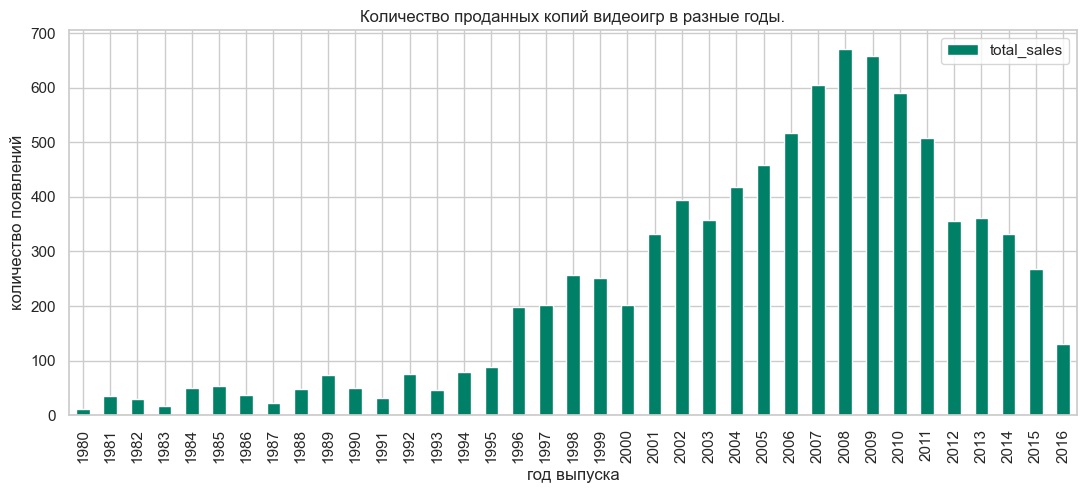

In [18]:
data.pivot_table(index=['year_of_release'], values=['total_sales'], aggfunc='sum')\
.plot.bar(figsize=(13, 5), grid=True, legend = True, colormap='summer')
plt.title(r'Количество проданных копий видеоигр в разные годы.')
plt.xlabel('год выпуска')
plt.ylabel(r'количество появлений');
plt.show()

На основании полученной гистограммы, можно заметить, что, количество проданных копий видеоигр в период с 1980 до 1995 года было крайне мало, в сравнении с последующими годами. Активный рост начался с 1996 года и продолжался до 2009 года включительно. Далее с 2010 года количество выпускаемых игр стало активно сокращаться. С 2012 по 2014 годы количество выпущенных видеоигр оставалось на довольно стабильном уровне. Однако с 2015 года также начало активно сокращаться.

Таким образом, можно сделать вывод, что игровая сфера очень активно развивалась с 1996, ее пик пришелся на 2008 год.

Для работы над главной задачей исследования нет необходимости рассматривать данные за все годы. Чтобы определить необходимый для дальнейшего исследования период, рассмотрим подробнее продажи по различным платформам.


<a id="analysis2"></a> 
#### Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

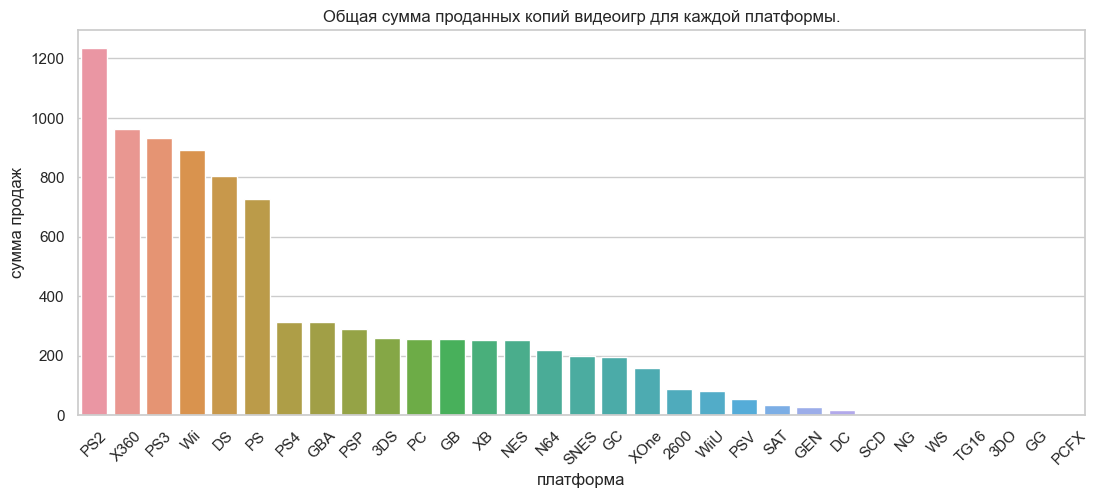

In [19]:
platforms_sum_total = data.pivot_table(index=['platform'], values=['total_sales'], aggfunc='sum')\
.reset_index().sort_values(by='total_sales', ascending=False)

plt.figure(figsize=(13, 5))
sns.barplot(data=platforms_sum_total, x='platform', y='total_sales')
plt.xticks(rotation=45)
plt.title(r'Общая сумма проданных копий видеоигр для каждой платформы.')
plt.xlabel('платформа')
plt.ylabel(r'сумма продаж');
plt.show()


Рассмотрев данные о продаже всех видеоигр в разбивке по платформам, можно выделить топ-6 лидирующих платформ. За весь представленный период в датафрейме лидером по продажам являлась платформа PS2, также можно выделить еще 6 конкурирующих платформ: X360, PS3, Wii, DS, PS. 

***Рассмотрим распределение продаж по 6 лидирующим платформам по годам.***

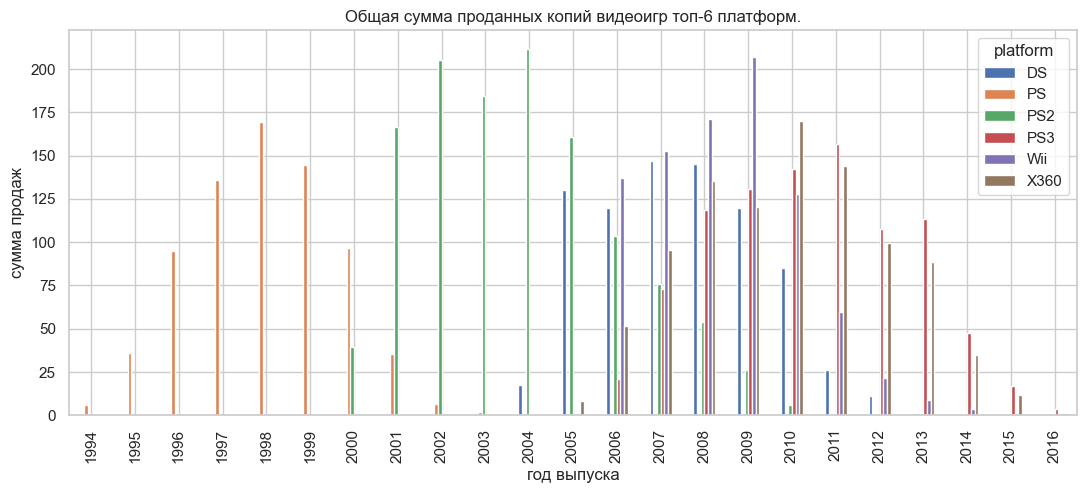

In [20]:
popular_platforms = data.query('platform == "PS2" or platform == "X360" or platform == "PS3" or platform == "Wii" or \
platform == "DS" or platform == "PS"')

popular_platforms.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')\
.plot.bar(figsize=(13, 5));
plt.title(r'Общая сумма проданных копий видеоигр топ-6 платформ.')
plt.xlabel('год выпуска')
plt.ylabel(r'сумма продаж');
plt.show()

На основании получившихся данных, можно сделать следующие выводы:
С 1994 года среди активно продающихся игр выделяется платформа PS, далее, в 2000 году появляется уже вторая платформа. В 2004 году платформа PS исчезает с диаграммы, а на ее замену приходит новая платформа DS. После 2005 года количество платформ, с крупными продажами увеличивается, так с 2006 по 2010 рынок делится уже между 5 главными платформами. В разные периоды лидирующие платформы меняются, это вызвано выходом новых платформ.

***Далее рассмотрим подробнее продажи видеоигр для каждой платформы из топ-6.***

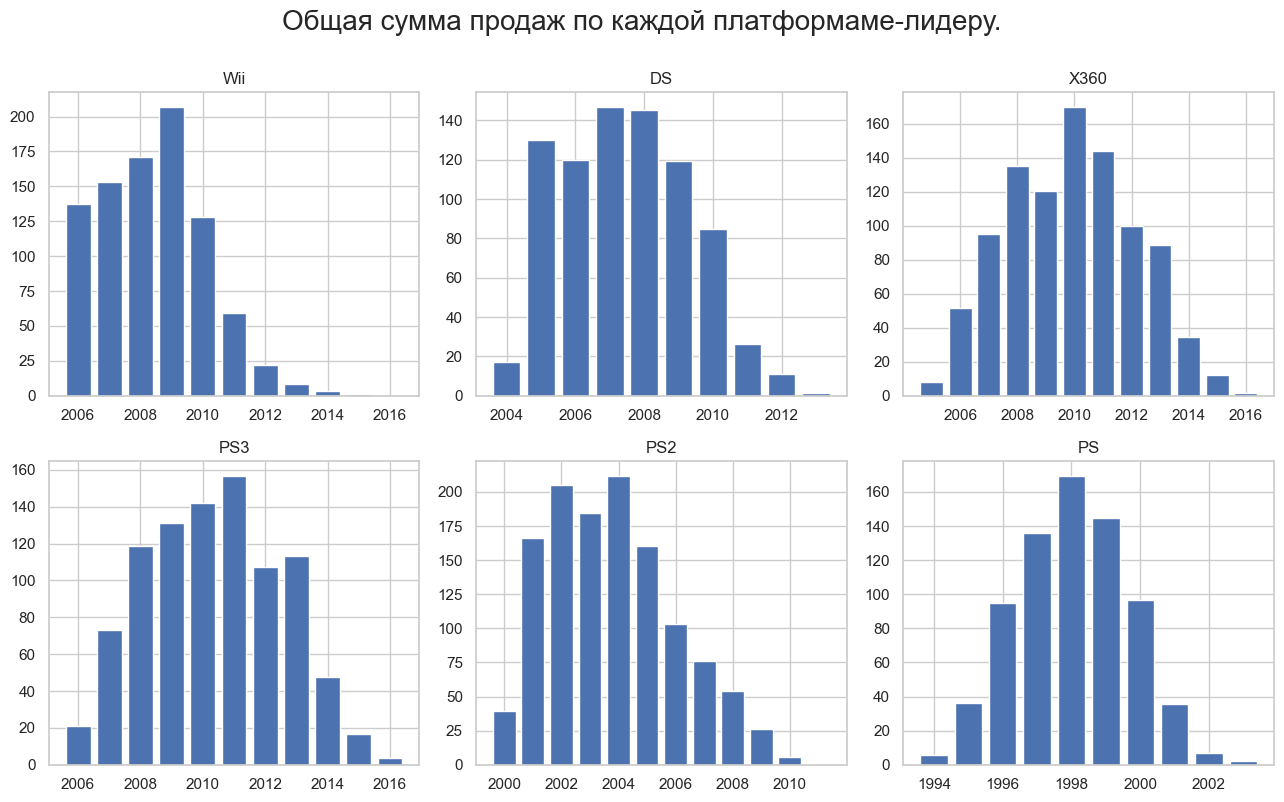

In [21]:
p = popular_platforms.groupby(['platform','year_of_release']).agg(total_sales=('total_sales', 'sum')).reset_index()
wii = p[p['platform'] == "Wii"]
ds = p[p['platform'] == "DS"]
x360 = p[p['platform'] == "X360"]
ps3 = p[p['platform'] == "PS3"]
ps2 = p[p['platform'] == "PS2"]
ps = p[p['platform'] == "PS"]


fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(13, 8))
axs[0, 0].bar(wii['year_of_release'], wii['total_sales'])
axs[0, 0].set_title('Wii', loc = 'center', pad = 6)
    
axs[0, 1].bar(ds['year_of_release'], ds['total_sales'])
axs[0, 1].set_title('DS', loc = 'center', pad = 6)

axs[0, 2].bar(x360['year_of_release'], x360['total_sales'])
axs[0, 2].set_title('X360', loc = 'center', pad = 6)

axs[1, 0].bar(ps3['year_of_release'], ps3['total_sales'])
axs[1, 0].set_title('PS3', loc = 'center', pad = 6)

axs[1, 1].bar(ps2['year_of_release'], ps2['total_sales'])
axs[1, 1].set_title('PS2', loc = 'center', pad = 6)

axs[1, 2].bar(ps['year_of_release'], ps['total_sales'])
axs[1, 2].set_title('PS', loc = 'center', pad = 6)

fig.suptitle('Общая сумма продаж по каждой платформаме-лидеру.', y = 1, fontsize = 20)

plt.tight_layout()
plt.show()

Рассматривая распределение продаж по годам для каждой платформы, можно сделать вывод, что общий срок использования наиболее популярных платформ, выпущенных за разные периоды времени, варьируется от 10 до 12 лет. Практически по всем платформам, кроме Wii, в первый год выхода платформы продажи видеоигр крайне низкие, и это логически объяснимо, так как игры только начинают разрабатывать и оптимизировать для новых платформ. Именно из-за активные продажи начинаются на 2 или 3 год, в зависимости от платформы, и продолжаются 3-4 года.

<a id="analysis3"></a> 
#### Возьмите данные за соответствующий актуальный период. 

Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

Не учитывайте в работе данные за предыдущие годы.

In [22]:
actuality_years = data[data['year_of_release'] >= 2014]

Исходя из всех рассмотренных данных, можно сказать, что сфера видеоигр в определенный момент начала стремительно развиваться и расти. Было создано большое количество платформ, однако конкурентоспособных платформ можно выделить всего 6. Наибольшее количество продаваемых игр приходится на 2-3 год после выхода новой глобальной платформы и длится около 4 лет. 

Так как главной задачей исследования заключается выявления закономерностей, определяющих успешность игры, для составления эффективных рекламных компаний на 2017 год, стоит глубже исследовать период предшествующих 3 лет.

<a id="analysis4"></a> 
#### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

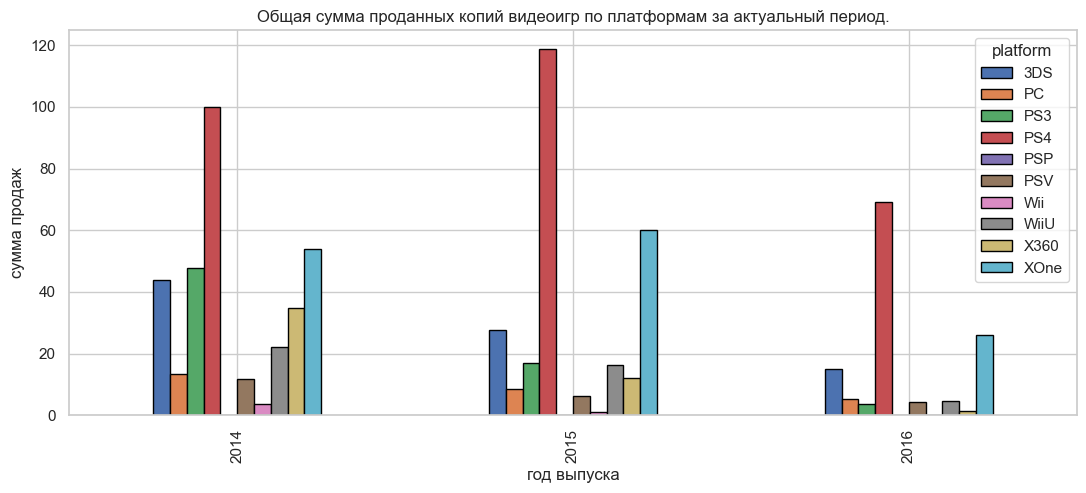

In [23]:
#my_colors = [(x/10.0, x/20.0, 0.75) for x in range(len(df))] # gradient example
actuality_years.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')\
.plot.bar(figsize=(13, 5), edgecolor='black');
plt.title(r'Общая сумма проданных копий видеоигр по платформам за актуальный период.')
plt.xlabel('год выпуска')
plt.ylabel(r'сумма продаж');
plt.show()

На диаграмме видно, что в 2014 году выделяется 5 платформ с крупными продажами, и с каждым годом их количество сокращалось. Так уже к 2016 году осталась 1 лидирующая платформа и 2 конкурирующие. Продажи по большей части платформ идут на снижение. На 2016 год следует выделить 3 лидирующих платформы (их лидерство заметно и по 2 предыдущим годам): PS4, Xone, DS.

<a id="analysis5"></a> 
#### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

In [24]:
box = actuality_years.groupby('platform')['total_sales']
box.describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,212.00,0.41,1.19,0.01,0.03,0.09,0.25,11.68
PC,151.00,0.18,0.33,0.01,0.02,0.06,0.20,3.05
PS3,219.00,0.31,0.63,0.01,0.04,0.11,0.33,5.27
PS4,376.00,0.77,1.61,0.01,0.06,0.18,0.69,14.63
PSP,13.00,0.03,0.03,0.01,0.01,0.02,0.02,0.09
PSV,295.00,0.08,0.14,0.01,0.02,0.04,0.09,1.96
Wii,11.00,0.46,0.63,0.01,0.04,0.18,0.76,2.01
WiiU,73.00,0.59,1.16,0.01,0.05,0.19,0.57,7.09
X360,111.00,0.43,0.63,0.01,0.07,0.18,0.51,4.28


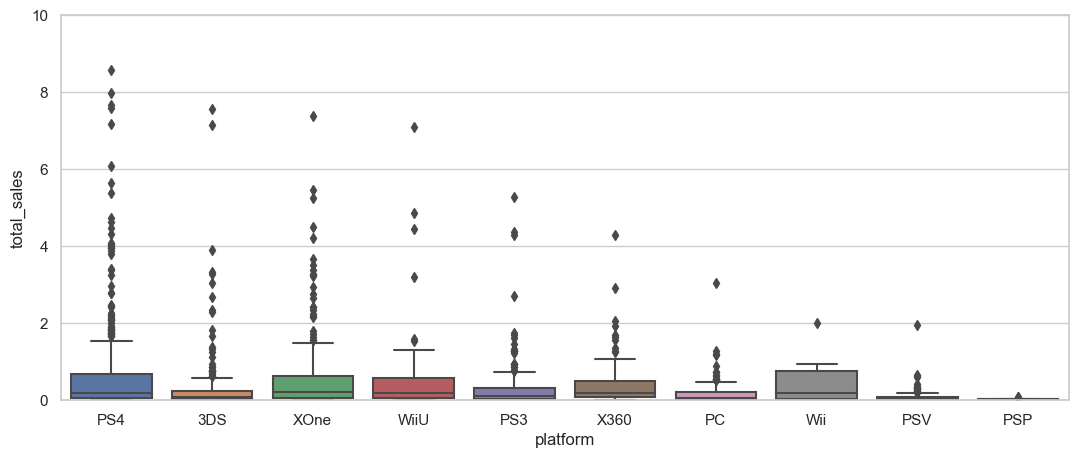

In [25]:
plt.figure(figsize=(13, 5))
sns.boxplot(data=actuality_years, x='platform', y='total_sales')
plt.ylim(0, 10);
plt.show()

По выведенной диаграмме можно сказать, только то, что по всем платформам имеются крайне высокие продажи, лидер по ним PS 4.

Ограничим общие продажи, чтобы подробнее рассмотреть "ящики".

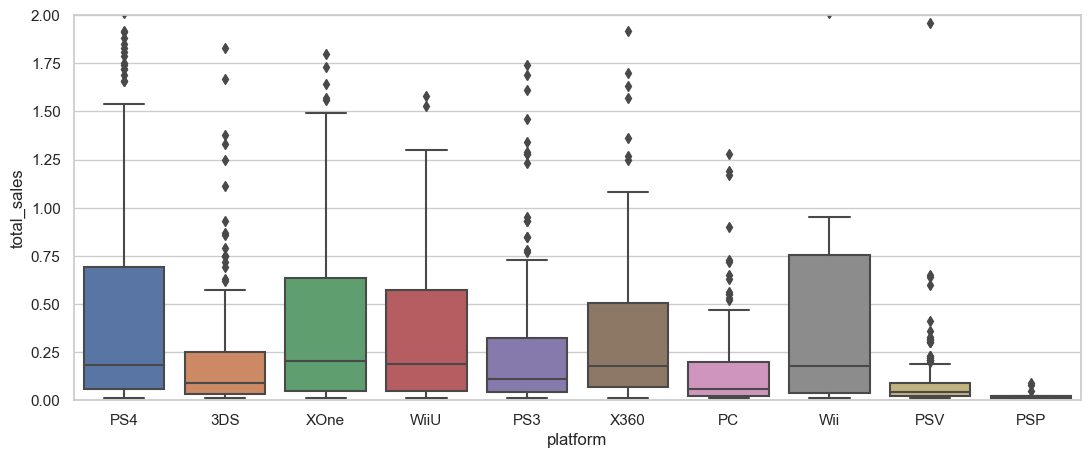

In [26]:
plt.figure(figsize=(13, 5))
sns.boxplot(data=actuality_years, x='platform', y='total_sales')
plt.ylim(0,2);
plt.show()

Исходя из данных можно выделить, что из всех представленных платформ наибольшее значение по медиане приходится на платформы Wii и PS4, а также XOne, следовательно по данным платформам общие продажи видеоигр достаточно высокие и стабильны, а вот платформа 3DS(один из лидеров по общей сумме проданных копий)имеет довольно низкую медиану, следовательно лидерство приносят ей, скорее всего, бестселлеры. Аутсайдером среди платформ можно назвать PSP.

<a id="analysis6"></a> 
#### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

Построим диаграммы рассеяния по 3-м лидирующим платформам.

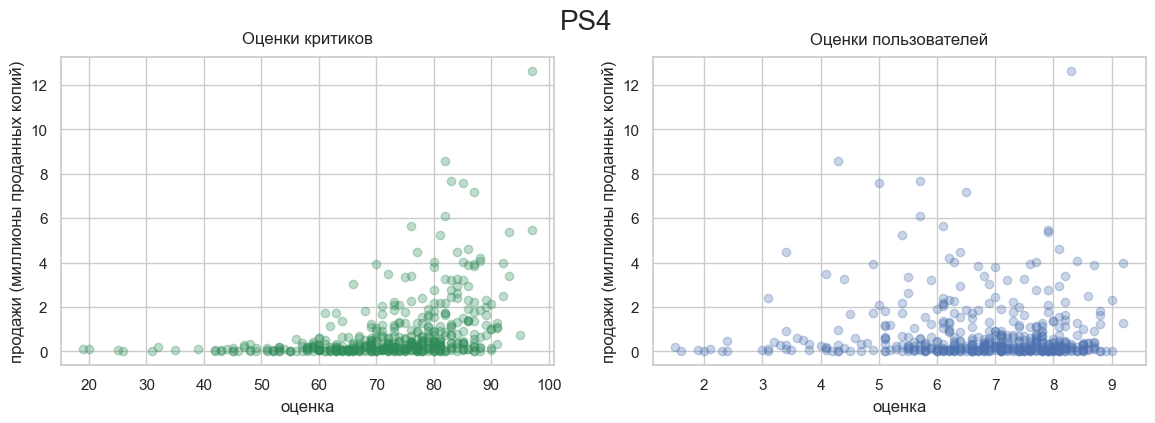

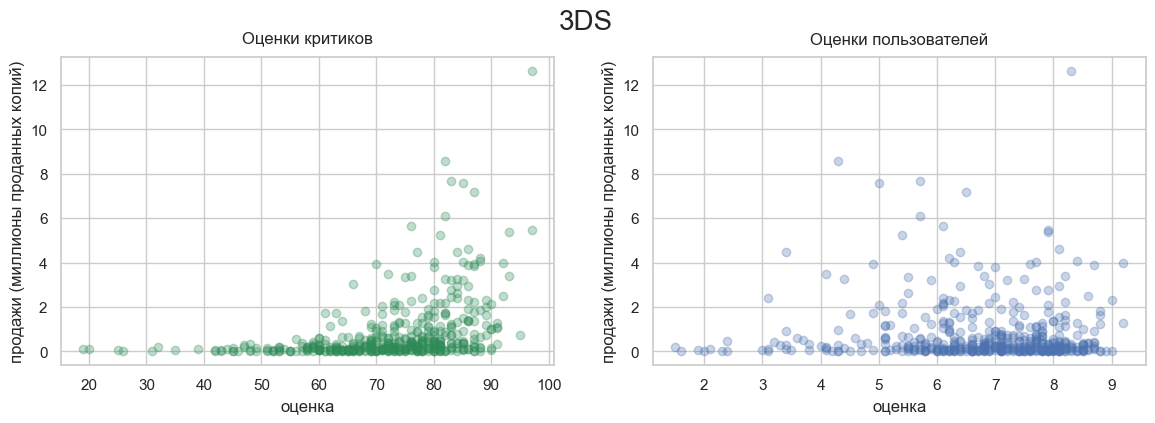

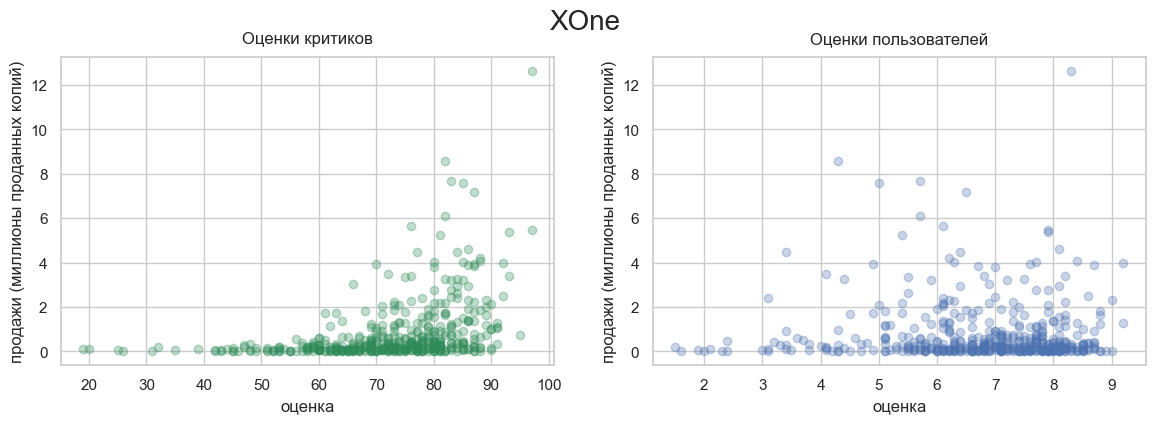

In [27]:
top_platform = actuality_years.query('platform == "PS4" or platform == "3DS" or platform == "XOne"')
for x in top_platform['platform'].unique():
    fig, axes = plt.subplots(1, 2)
    axes[0].scatter(top_platform['critic_score'], top_platform['total_sales'],alpha=0.3, c='seagreen');
    axes[0].set_title('Оценки критиков', loc = 'center', pad = 10)
    axes[0].set_xlabel('оценка')
    axes[0].set_ylabel('продажи (миллионы проданных копий)');
    
    axes[1].scatter(top_platform['user_score'], top_platform['total_sales'],alpha=0.3);
    axes[1].set_title('Оценки пользователей', loc = 'center', pad = 10)
    axes[1].set_xlabel('оценка')
    axes[1].set_ylabel('продажи (миллионы проданных копий)');
    fig.suptitle(x, y = 1, fontsize = 20)
    fig.set_figheight(4)
    fig.set_figwidth(14)
    
plt.show()

Построим таблицу с корреляцией между оценками и продажами.

In [28]:
top_platform_correlation = top_platform.groupby('platform').corr().reset_index()
top_platform_correlation = top_platform_correlation.loc[(top_platform_correlation['level_1'] == 'critic_score') |\
                             (top_platform_correlation['level_1'] == 'user_score')]\
.drop(axis=1, columns=['year_of_release','user_score','critic_score'])
top_platform_correlation['platform'] = top_platform_correlation['platform'] + '_' + top_platform_correlation['level_1']
top_platform_correlation = top_platform_correlation.drop(axis=1, columns=['level_1'])

display( top_platform_correlation.style.background_gradient(subset=['total_sales','other_sales', 'na_sales',\
                                                                   'eu_sales', 'jp_sales'], cmap='YlOrBr'))

,platform,na_sales,eu_sales,jp_sales,other_sales,total_sales
5,3DS_critic_score,0.363441,0.178086,0.279149,0.330872,0.314117
6,3DS_user_score,0.254592,0.014621,0.235903,0.203967,0.215193
13,PS4_critic_score,0.411638,0.340268,0.379041,0.404645,0.402661
14,PS4_user_score,-0.016156,-0.064199,0.179384,-0.044166,-0.040132
21,XOne_critic_score,0.401137,0.385121,0.207366,0.425689,0.428677
22,XOne_user_score,-0.068053,-0.061547,0.062259,-0.069776,-0.070384


По выведенным диаграммам, а также таблице с корреляцией можно выделить следующее:
- имеется небольшая прямая зависимость между оценкой критиков и продажами по всем платформам. Наибольшая зависимость наблюдается по платформе XOne и составляет около 0.43. Самая низкая у платформы 3DS - 0.31. В разбивке по регионам ситуация практически не изменяется, однако стоит отметить, что наименьшая зависимость между продажами и оценкой критиков у платформы 3DS в Европе(~0,17), а наибольшая - XOne в Америке и других странах.

- зависимость между продажами и оценками пользователей отсутствует у платформ XOne и PS4, у платформы 3DS зависимость проследить можно. В разбивке по регионам ситуация немного меняется, и стоит отметить, что в Японии по платформам3DS и PC4 имеется зависимость, но очень низкая. В Америке показатель корреляции также положительный и составляет 0.25 

**Соотнесите выводы с продажами игр на других платформах.**

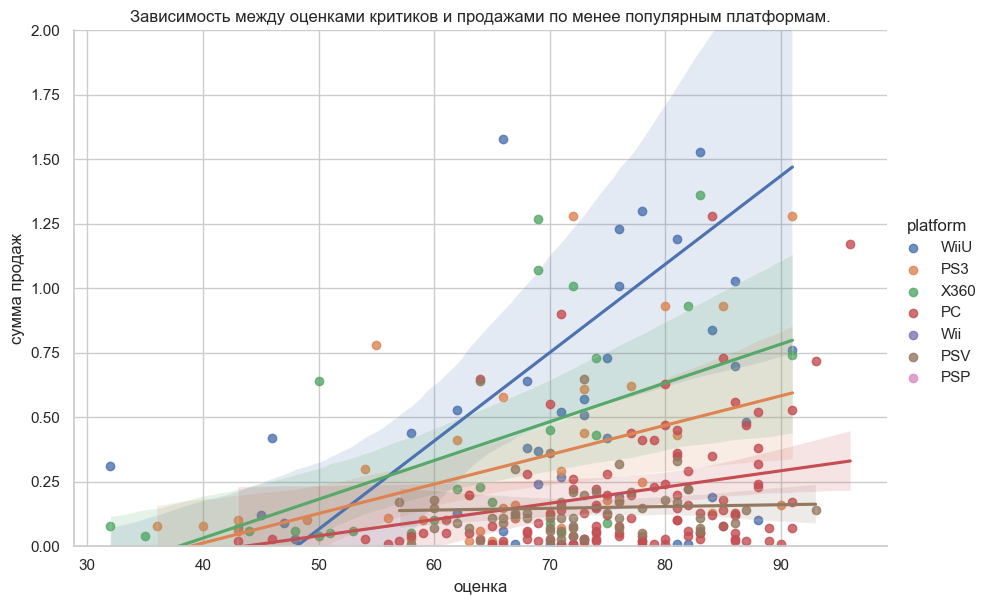

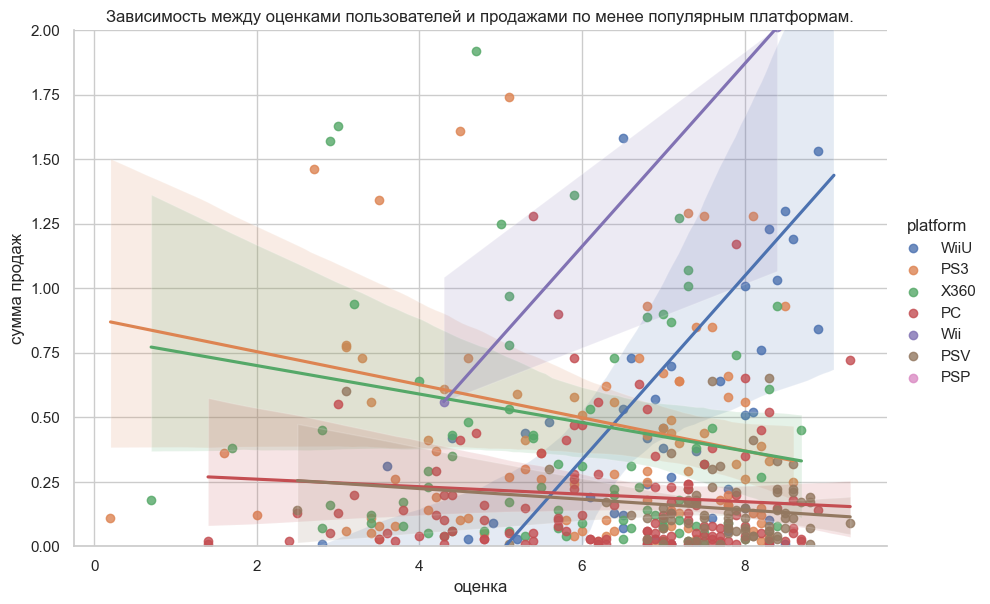

In [29]:
other_platform = actuality_years.query('platform != "PS4" and platform != "3DS" and platform != "XOne" ')

sns.lmplot(x='critic_score', y='total_sales', data=other_platform, hue='platform', height= 6 , aspect= 1.5 );
plt.ylim(0,2);
plt.title(r'Зависимость между оценками критиков и продажами по менее популярным платформам.')
plt.xlabel('оценка')
plt.ylabel(r'сумма продаж');
plt.show()

sns.lmplot(x='user_score', y='total_sales', data=other_platform, hue='platform', height= 6 , aspect= 1.5 );
plt.ylim(0,2);
plt.title(r'Зависимость между оценками пользователей и продажами по менее популярным платформам.')
plt.xlabel('оценка')
plt.ylabel(r'сумма продаж');
plt.show()

In [30]:
other_platform_correlation = other_platform.groupby('platform').corr().reset_index()
other_platform_correlation = other_platform_correlation.loc[(other_platform_correlation['level_1'] == 'critic_score') |\
                             (other_platform_correlation['level_1'] == 'user_score')]\
.drop(axis=1, columns=['year_of_release','user_score','critic_score'])
other_platform_correlation['platform'] = other_platform_correlation['platform'] + '_' + other_platform_correlation['level_1']
other_platform_correlation = other_platform_correlation.drop(axis=1, columns=['level_1'])

display(other_platform_correlation.style.background_gradient(subset=['total_sales','other_sales', 'na_sales',\
                                                                   'eu_sales', 'jp_sales'], cmap='Purples'))

,platform,na_sales,eu_sales,jp_sales,other_sales,total_sales
5,PC_critic_score,0.186056,0.158962,nan,0.183201,0.174634
6,PC_user_score,-0.081692,-0.061836,nan,-0.076442,-0.071597
13,PS3_critic_score,0.412858,0.287064,0.450181,0.390738,0.446575
14,PS3_user_score,-0.222793,-0.161817,0.295358,-0.206106,-0.166761
21,PSP_critic_score,nan,nan,nan,nan,nan
22,PSP_user_score,nan,nan,nan,nan,nan
29,PSV_critic_score,-0.084749,0.152559,0.070011,-0.007229,0.042665
30,PSV_user_score,-0.067526,-0.480108,0.194734,-0.312191,-0.168455
37,Wii_critic_score,nan,nan,nan,nan,nan
38,Wii_user_score,1.000000,1.000000,nan,1.000000,1.000000


По остальным платформам зависимость между оценками пользователей и критиков и продажами очень разнообразна. Имеются платформы, у которых есть зависимость сразу по 2 видам оценок, а также есть платформы, в которых она отсутствует. Предшественники платформ лидеров PS3 и X360, в целом, имеют схожие показатели по зависимости. Также не по всем платформам имеются данные по оценкам. 

<a id="analysis7"></a> 
#### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

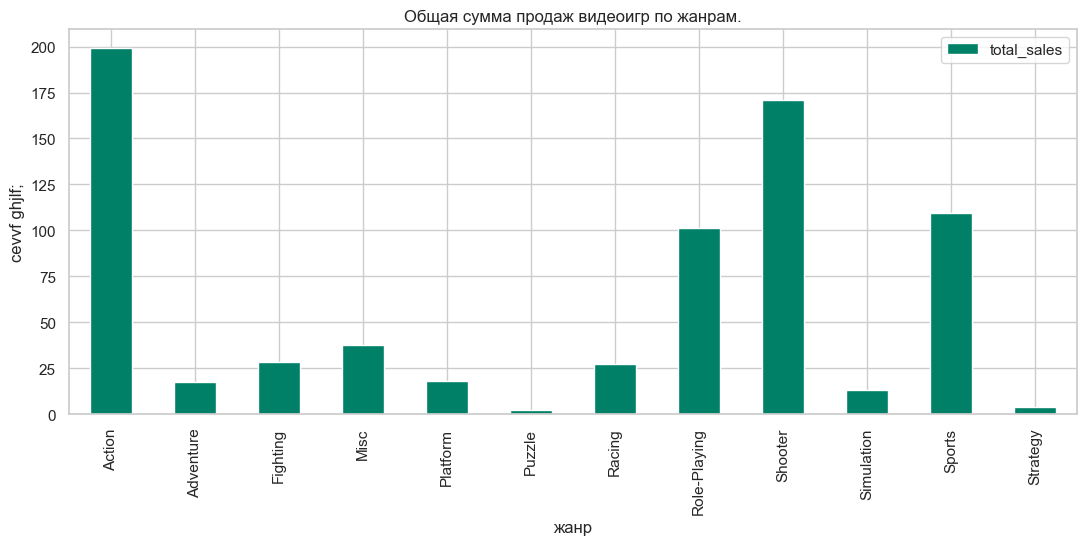

In [31]:
actuality_genres = pd.pivot_table(actuality_years,index=['genre'],values=['total_sales'],aggfunc='sum').plot.bar(figsize=(13, 5), legend = True, colormap='summer')
plt.title('Общая сумма продаж видеоигр по жанрам.');
plt.xlabel('жанр')
plt.ylabel(r'cevvf ghjlf;');
plt.show()

На основании данных, представленных на диаграмме, можно сделать вывод о том, что наибольшие продажи приходятся на жанр видеоигр Action, также большое количество проданных копий приходится на жанры Shooter, Sports, и Role-Playing. Остальные жанры имеют объем продаж значительно меньший. 

Рассмотрим распределение продаж по жанрам через диаграмму размаха.

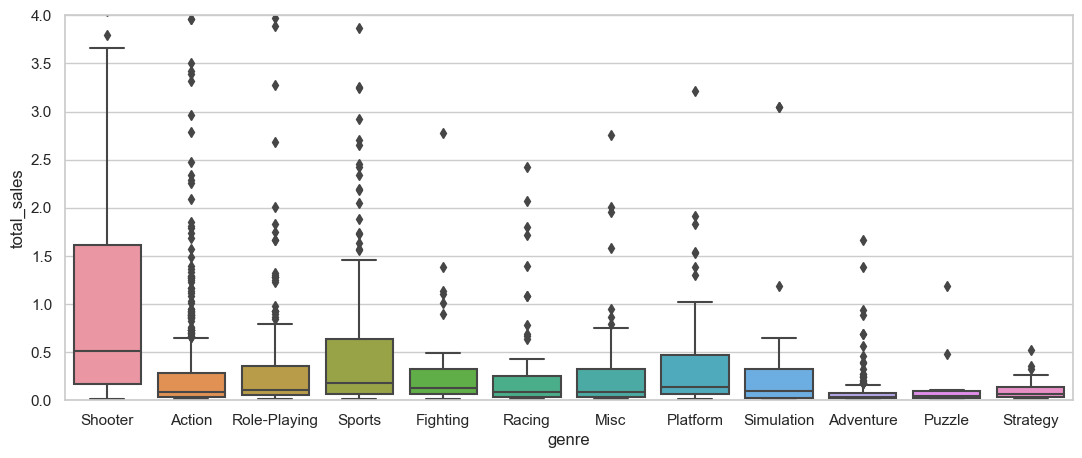

In [32]:
plt.figure(figsize=(13, 5))
sns.boxplot(data=actuality_years, x='genre', y='total_sales')
plt.ylim(0,4);
plt.show()

Данные диаграммы размаха показывают, что в целом большие продаже у жанра Shooter, далее у Sports. Вероятнее всего жанр Action увеличивает число продаж за счёт отдельных популярных игр, а shooter в целом лучше продаётся, даже если хитовых игр меньше.

***Подводя итог по исследовательскому анализу данных, обобщим выявленные особенности:***

- Сфера видеоигр очень разнообразна и стремительна, она начала очень активно развиваться с 1996, ее пик пришелся на 2008 год. За весь представленный период в датафрейме лидером по продажам являлась платформа PS2, также можно выделить еще 6 конкурирующих платформ: X360, PS3, Wii, DS, PS.

- В разные периоды лидирующие платформы меняются, это вызвано выходом новых платформ. Модели выпускались с периодичностью в год, в некоторых годах выпускались и по 2 новых платформы сразу. Общий срок использования наиболее популярных платформ, выпущенных за разные периоды времени, варьируется от 10 до 12 лет. В первый год выхода платформы продажи видеоигр крайне низкие, и это логически объяснимо, так как игры только начинают разрабатывать и оптимизировать для новых платформ. Так активные продажи продолжаются 3-4 года.

- Общие продажи видеоигр достаточно высокие и стабильны у платформ Wii и PS4, а также XOne, а вот платформа 3DS(один из лидеров по общей сумме проданных копий)имеет довольно низкие медианные продажи, следовательно лидерство приносят ей, скорее всего, бестселлеры.

- В целом можно наблюдать небольшую прямую зависимость между оценками критиков и продажами видеоигр по различным платформам, а оценки пользователей, напротив, зависимости не имеют. Исключения имеются по нескольким платформам и регионам.

- Наибольшие общие продажи приходятся на жанр видеоигр Action, а наименьшие на жанр Ruzzle. А одиночно по видеоиграм в целом больше продаж у жанра Shooter.

<a id="portrait"></a> 
### Составим портрет пользователя каждого региона.

<a id="portrait1"></a>
#### Определите для пользователя каждого региона (NA, EU, JP) самые популярные платформы (топ-5). Опишите различия в долях продаж.

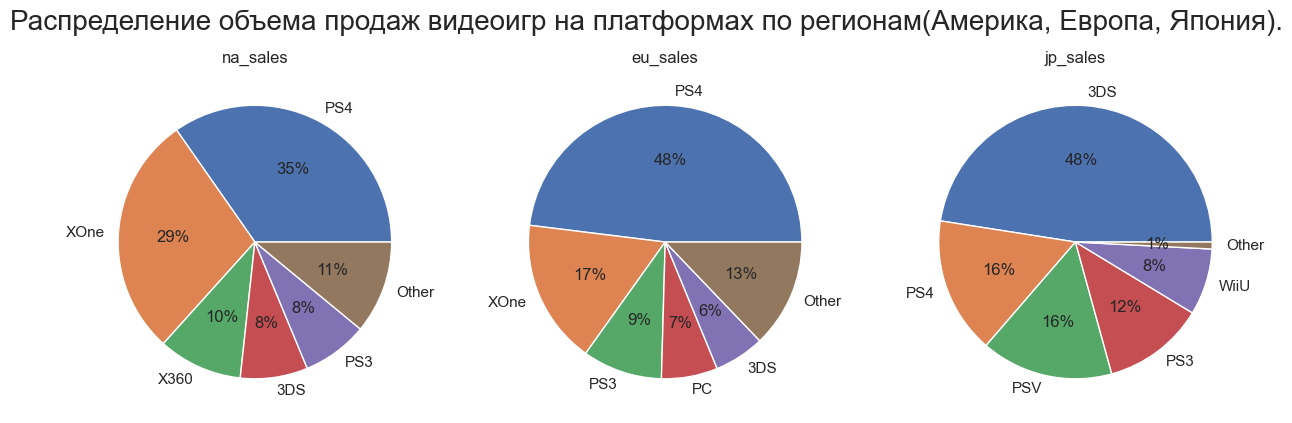

In [42]:
fig, axes = plt.subplots(1, 3, figsize=(15, 15))
axes = axes.ravel()
fig.suptitle('Распределение объема продаж видеоигр на платформах по регионам(Америка, Европа, Япония).', y = 0.65, fontsize = 20)
x=0
na_platforms = 0
eu_platforms = 0
jp_platforms = 0
for x, y in enumerate(['na_sales', 'eu_sales', 'jp_sales']):
    platforms = actuality_years.groupby('platform').agg({y: 'sum'}).sort_values(by=y, ascending=False)
    top5_platforms = platforms.head(5)
    platforms_ind = platforms.reset_index()
    other_platforms =  pd.DataFrame(platforms_ind[platforms_ind.index > 4][y]\
                                    .sum(), index=['Other'], columns=[y])
    top_platforms = pd.concat([top5_platforms, other_platforms])
    axes[x].pie(top_platforms[y], labels=top_platforms.index, autopct='%.0f%%')
    axes[x].set_title(y)
    if y == 'na_sales':
        na_platforms = top_platforms
    elif y == 'eu_sales':
        eu_platforms = top_platforms
    else:
        jp_platforms = top_platforms
plt.show()
 
widget1 = widgets.Output()
widget2 = widgets.Output()
widget3 = widgets.Output()
 
with widget1:
    display(na_platforms.style.background_gradient(subset=['na_sales'], cmap='Blues'))
with widget2:
    display(eu_platforms.style.background_gradient(subset=['eu_sales'], cmap='Purples'))
with widget3:
    display(jp_platforms.style.background_gradient(subset=['jp_sales'], cmap='Reds'))
 
    
box_layout = Layout(display='flex',
                    flex_flow='row',
                    justify_content='space-around',
                    width='950px'
                   )
hbox = widgets.HBox([widget1, widget2, widget3], layout=box_layout)
#hbox #вывод таблиц одной стокой

In [41]:
display(na_platforms.style.background_gradient(subset=['na_sales'], cmap='Blues'))

display(eu_platforms.style.background_gradient(subset=['eu_sales'], cmap='Purples'))

display(jp_platforms.style.background_gradient(subset=['jp_sales'], cmap='Reds'))

,na_sales
PS4,98.610000
XOne,81.270000
X360,28.300000
3DS,22.640000
PS3,22.050000
Other,31.190000


,eu_sales
PS4,130.040000
XOne,46.250000
PS3,25.540000
PC,17.970000
3DS,16.120000
Other,34.760000


,jp_sales
3DS,44.240000
PS4,15.020000
PSV,14.540000
PS3,11.220000
WiiU,7.310000
Other,0.760000


***Распределив данные по 3 различным регионам, были сформированы круговые диаграммы с долей продаж видеоигр по платформам, а также таблицы с общим количеством продаж игр по платформам.***

На основании составленных данных можно сделать следующие выводы:

- по регионам Америка и Европа продажи игр на платформах PS4 и X360 находятся на одних и тех же уровнях, но имеют разное процентное соотношение. Так в обоих регионах платформа о PS4 является лидером, а объем продаж составляет: в Америке - 35%, в Европе-48%. Платформа XOne занимает 2 место, а объем продаж в Америке составляет 29%, а в Европе 17%. Также, в этих регионах особой популярностью пользуются и другие платформы, общая доля продаж по ним составляет 11% в Америке и 13% в Европе. Также среди платформ-лидеров стоит отметить имеющиеся в двух регионах платформы - PS3 и 3DS. Отличающиеся платформы: в Америке присутствует X360, а в Европе PC.


- в Японии ситуация с продажей игр на различные платформы обстоит совершенно иначе. Лидирующую позицию в данном регионе занимает платформа 3DS, объем продаж игр на платформу составляет 48%. Также как и в предыдущих, рассматриваемых регионах, в Японии присутствует платформа PS4 и занимает 2 место по объему продаж (16%) и платформа PS3 (12%). Остальные позиции занимают платформы, которые не занимаю лидерство ни в Америке, ни в Европе. PSV - 16%, Wii-8%. Также следует отметить, что в Японии крайне мала доля платформ, не вошедших в топ по продажам видеоигр на них, так доля продаж игр на эти платформы составляет всего 1%.


<a id="portrait2"></a>
#### Определите для пользователя каждого региона (NA, EU, JP) самые популярные жанры (топ-5). Поясните разницу.

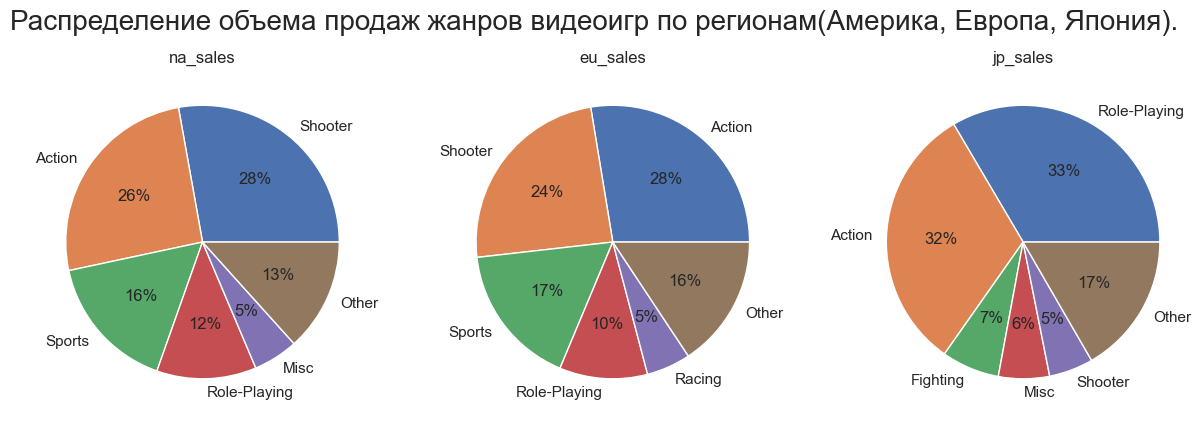

In [44]:
fig, axes = plt.subplots(1, 3, figsize=(15, 15))
axes = axes.ravel()
fig.suptitle('Распределение объема продаж жанров видеоигр по регионам(Америка, Европа, Япония).', y = 0.65, fontsize = 20)
x=0
na_genres = 0
eu_genres = 0
jp_genres = 0
for x, y in enumerate(['na_sales', 'eu_sales', 'jp_sales']):
    genres = actuality_years.groupby('genre').agg({y: 'sum'}).sort_values(by=y, ascending=False)
    top5_genres = genres.head(5)
    genres_ind = genres.reset_index()
    other_genres =  pd.DataFrame(genres_ind[genres_ind.index > 4][y]\
                                    .sum(), index=['Other'], columns=[y])
    top_genres = pd.concat([top5_genres, other_genres])
    axes[x].pie(top_genres[y], labels=top_genres.index, autopct='%.0f%%')
    axes[x].set_title(y)
    if y == 'na_sales':
        na_genres = top_genres
    elif y == 'eu_sales':
        eu_genres = top_genres
    else:
        jp_genres = top_genres
plt.show()
 
widget1 = widgets.Output()
widget2 = widgets.Output()
widget3 = widgets.Output()
 
with widget1:
    display(na_genres.style.background_gradient(subset=['na_sales'], cmap='Blues'))
with widget2:
    display(eu_genres.style.background_gradient(subset=['eu_sales'], cmap='Purples'))
with widget3:
    display(jp_genres.style.background_gradient(subset=['jp_sales'], cmap='Reds'))
 
    
box_layout = Layout(display='flex',
                    flex_flow='row',
                    justify_content='space-around',
                    width='950px'
                   )
hbox = widgets.HBox([widget1, widget2, widget3], layout=box_layout)
#hbox #вывод таблиц одной стокой

In [43]:
display(na_genres.style.background_gradient(subset=['na_sales'], cmap='Blues'))

display(eu_genres.style.background_gradient(subset=['eu_sales'], cmap='Purples'))

display(jp_genres.style.background_gradient(subset=['jp_sales'], cmap='Reds'))

,na_sales
Shooter,79.020000
Action,72.530000
Sports,46.130000
Role-Playing,33.470000
Misc,15.050000
Other,37.860000


,eu_sales
Action,74.680000
Shooter,65.520000
Sports,45.730000
Role-Playing,28.170000
Racing,14.130000
Other,42.450000


,jp_sales
Role-Playing,31.160000
Action,29.580000
Fighting,6.370000
Misc,5.610000
Shooter,4.870000
Other,15.500000


Распределив данные по 3 различным регионам, были сформированы круговые диаграммы с долей продаж видеоигр по жанрам, а также таблицы с общим количеством продаж игр по жанрам. 

На основании составленных данных можно сделать следующие выводы:

В основном во всех 3 регионах присутствуют практически одни и те же жанры, однако имеют разный объем продаж. Опишем конкретнее жанры по каждому региону.

- в Америке самым продаваемым жанром является Shooter, его доля составляет 28%. Немного меньший объем продаж приходится на жанр Action(26%). Эти жанры лидирующие и имеют более 50% продаж в данном регионе. Также популярны такие жанры, как Sports(16%), Role-Playing(12%), а также Misc(5%). 13% от общего объема продаж в Америке приходится на другие жанры.

- в Европе также как и в Америке первые 4 места занимают жанры Action(28%), Shooter(24%), Sports(17%), Role-Playing(10%), единственное отличие, это то, что в этом регионе жанр Action занимает лидирующую позицию, а после уже Shooter. Также в Европе 5% от общих продаж видеоигр приходится на жанр Racing.

- в Японии распределение жанров видеоигр по объему продаж отличается сильнее от предыдущих регионов. Так, наибольшую популярность имеет жанр Role-Playing, его объем составляет 33%, что является 1/3 от всех продаж, а в Европе и Америке доля продаж этого жанра в 3 раза ниже.  Жанр Action, который очень популярен в Европе и Америке, имеет большую долю и в Японии, доля продаж по нему составляет 32%, это еще 1/3 всего объема. Остальная часть продаж приходится на такие жанры как Fighting(7%), Misc(6%), Shooter(5%), а также на другие жанры(17%). Стоит отметить, что в Японии игры жанра Shooter имеют меньшую популярность, чем в двух других регионах.


<a id="portrait3"></a>
#### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

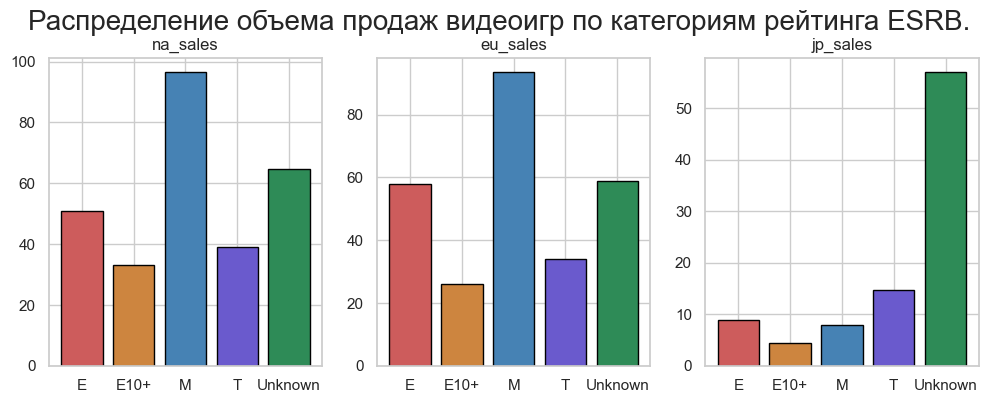

In [35]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes = axes.ravel()
fig.suptitle('Распределение объема продаж видеоигр по категориям рейтинга ESRB.', y = 1, fontsize = 20)
x=0
for x, y in enumerate(['na_sales', 'eu_sales', 'jp_sales']):
    ESRB = actuality_years.groupby('rating').agg({y: 'sum'}).reset_index()
    axes[x].bar(ESRB['rating'], ESRB[y], color=['indianred', 'peru', 'steelblue' ,'slateblue', 'seagreen'],edgecolor='black')
    axes[x].set_title(y)
plt.show()


Составив диаграммы по распределению объема продаж видеоигр по категориям рейтинга ESRB в Америке, Европе и Японии можно сделать следующие выводы:

- в Европе и Америке ситуация по влиянию рейтинга на продажи примерно одинаковая. В Европе немного чаще продаются игры с рейтингом Е, а в Америке выше продажи игр с рейтингом Е10+ и Т. И в одном, и в другом регионе имеется значительная часть игр, в которых данный рейтинг не указан, возможно это особенность представленных данных или же рейтинг по возрастным ограничениям многим играм присвоен не был.


- в Японии распределение по продаже игр с рейтингом по возрастным ограничениям совершенно другое. Скорее всего, это связано с тем, что в Японии собственная система оценки рейтинга и значительную долю продаж занимают игры без присвоенной категории. Однако среди игр с рейтингом лидируют игры категории T.


In [36]:
sum_pl_na = sum(list(na_platforms['na_sales']))
sum_pl_eu = sum(list(eu_platforms['eu_sales']))
sum_pl_jp = sum(list(jp_platforms['jp_sales']))
print('Общие продажи видеоигр:', 'Северная Америка -', int(sum_pl_na), '/', 
      'Европа -', int(sum_pl_eu), '/', 'Япония -', int(sum_pl_jp))

Общие продажи видеоигр: Северная Америка - 284 / Европа - 270 / Япония - 93


**Подводя итоги по данному разделу можно составить следующие портреты пользователей каждого региона:**

- для Северной Америки наиболее популярными платформами являются PS4 и XOne, общая доля по объему продаж игр для этих платформ составляет более 60%. А наиболее часто продаваемые игры для данных платформ создаются в жанрах Shooter и Action, немного реже Sports. Возрастной рейтинг в играх относится к категории М, реже Е.

- для Европы также наибольшая популярность приходится на платформы PS4 и XOne, однако объем проданных игр на вторую платформу значительно ниже. Самые популярные жанры игр такие же, как и в Америке, различие лишь в том, что в этом регионе жанр Action популярнее, чем Shooter, Sports также на 3 месте. Относительно рейтинга возрастных ограничений ситуация такая же, как и в Северной Америке.

- индустрия видеоигр в Японии значительно отличается от двух предыдущих регионов. Так лидирующей платформой является платформа 3DS, на втором месте платформа PS4. Также в этом регионе отличается и жанровый лидер по продажам игр, в Японии это Role-Playing, чуть меньше объем продаж у жанра Action. Ситуация с возрастным ограничением в Японии тоже иная. По рейтингу ESRB игры не оцениваются.


<a id="hypotheses"></a> 
### Проверка гипотез.


- **Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;**

- **Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.**

Общепринятые пороговые значения для параметра  alpha — 5% и 1%. Их выбор зависит от размера выборки. 

Так как выборка является не слишком большой, но достаточной для проверки гипотез, выберем пороговое значение alpha как 0.05.

Также при формулировании гипотезы следует помнить, что никакие экспериментально полученные данные не подтвердят гипотезу. Это фундаментальное ограничение: гипотезу можно только опровергнуть или не опровергнуть.

Наши гипотезы подходят под критерий равенства средних двух генеральных совокупностей. Так как рейтинги платформ  и рейтинги жанров могут быть либо одинаковыми, т.е. равны, либо разными, т.е не равны.

Используем специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: scipy.stats.ttest_ind (array1, array2, equal_var).

<a id="hypotheses1"></a> 
#### Проверка гипотезы: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

 
**Сформулируем нулевую и альтернативную гипотезы:**
```
H_0: Пользовательские рейтинги (user_score) платформ Xbox One = пользовательским рейтингам (user_score) платформ PC`
H_a: Пользовательские рейтинги (user_score) платформ Xbox One ≠ пользовательским рейтингам (user_score) платформ PC`
alpha = 0.05
```

In [37]:
xone_user_score = actuality_years.loc[(actuality_years['platform'] == 'XOne') & \
                                      (~(actuality_years['user_score'].isna())), 'user_score']
pc_user_score = actuality_years.loc[(actuality_years['platform'] == 'PC') & \
                                      (~(actuality_years['user_score'].isna())), 'user_score']

results = st.ttest_ind(xone_user_score, pc_user_score, equal_var=False)# results = вызов метода для проверки гипотезы

alpha = 0.05# alpha = задайте значение уровня значимости


print(results.pvalue)# вывод значения p-value на экран 

if results.pvalue < alpha:# условный оператор с выводом строки с ответом
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


<a id="hypotheses2"></a> 
#### Проверка гипотезы: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

**Сформулируем нулевую и альтернативную гипотезы:**

```
H_0: Пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) = пользовательским рейтингам Sports (англ. «спортивные соревнования»)`
H_a: Пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) ≠ пользовательским рейтингам Sports (англ. «спортивные соревнования»)`
alpha = 0.05
```

In [38]:
action_user_score = actuality_years.loc[(actuality_years['genre'] == 'Action') & \
                                      (~(actuality_years['user_score'].isna())), 'user_score']
sports_user_score = actuality_years.loc[(actuality_years['genre'] == 'Sports') & \
                                      (~(actuality_years['user_score'].isna())), 'user_score']

results = st.ttest_ind(action_user_score, sports_user_score, equal_var=False)# results = вызов метода для проверки гипотезы

alpha = 0.05# alpha = задайте значение уровня значимости


print(results.pvalue)# вывод значения p-value на экран 

if results.pvalue < alpha:# условный оператор с выводом строки с ответом
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

1.1825550382644557e-14
Отвергаем нулевую гипотезу


***Проверка двух гипотез имеет следующие результаты:***

- гипотезу о равенстве средних пользовательских рейтингов платформ Xbox One и PC не получилось отвергнуть;

- гипотезу о равенстве средних пользовательских рейтингов жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») отвергаем, следовательно остается альтернативная гипотеза о том, что рейтинги не равны, т.е. разные.

Подкрепим выводы по гипотезам расчетами над средним по выборкам.

Найдем разность между ними средними значениями рейтинговых оценок по платформам, также по жанрам,  и сопоставим эту разность со значением alpha.
Если разность между средними меньше 5%, значит средние можно считать равными, а если больше-средние не равны.

In [39]:
xone_user_score_mean = xone_user_score.mean()
pc_user_score_mean = pc_user_score.mean()
print('Средний пользовательский рейтинг видеоигр по платформе "XOne":' , xone_user_score_mean)
print('Средний пользовательский рейтинг видеоигр по платформе "PC":', pc_user_score_mean)
raznost1 = xone_user_score_mean - pc_user_score_mean
raznost2 = pc_user_score_mean - xone_user_score_mean

if (((raznost1/xone_user_score_mean < alpha) == True) and ((raznost2/xone_user_score_mean < alpha) == True)) and\
(((raznost1/pc_user_score_mean < alpha) == True) and ((raznost2/pc_user_score_mean < alpha) == True)):
    print('Разность между средними жанров меньше 5%, следовательно средние равны')
else:
    print('Разность между средними жанров больше 5%, следовательно средние не равны')

Средний пользовательский рейтинг видеоигр по платформе "XOne": 6.594545454545453
Средний пользовательский рейтинг видеоигр по платформе "PC": 6.298360655737703
Разность между средними жанров меньше 5%, следовательно средние равны


In [40]:
action_user_score_mean = action_user_score.mean()
sports_user_score_mean = sports_user_score.mean()
print('Средний пользовательский рейтинг видеоигр жанра "Аction":', action_user_score_mean)
print('Средний пользовательский рейтинг видеоигр жанра "Sports":', sports_user_score_mean)

raznost3 = action_user_score_mean - sports_user_score_mean
raznost4 = sports_user_score_mean - action_user_score_mean

if (((raznost3/action_user_score_mean < alpha) == True) and ((raznost4/action_user_score_mean < alpha) == True)) and\
(((raznost3/sports_user_score_mean < alpha) == True) and ((raznost4/sports_user_score_mean < alpha) == True)):
    print('Разность между средними жанров меньше 5%, следовательно средние равны')
else:
    print('Разность между средними жанров больше 5%, следовательно средние не равны')

Средний пользовательский рейтинг видеоигр жанра "Аction": 6.760606060606054
Средний пользовательский рейтинг видеоигр жанра "Sports": 5.225196850393697
Разность между средними жанров больше 5%, следовательно средние не равны


<a id="rec"></a> 
### Выводы и рекомендации по исследованию.

**Подводя итоги по исследуемому датафрейму, можно сделать следующие выводы:**

- На платформы Wii и PS4, а также XOne, общие продажи видеоигр достаточно высокие и стабильные. А по платформе 3DS(один из лидеров по общей сумме проданных копий)имеет довольно низкие медианные продажи, следовательно лидерство приносят ей, скорее всего, бестселлеры.

- В целом можно наблюдать небольшую прямую зависимость между оценками критиков и продажами видеоигр по различным платформам. Средняя корреляция составляет 0,37. Большая часть платформ не имеют зависимости между оценками пользователей и продажами видеоигр. Однако имеются исключения по нескольким платформам и регионам.


- Наибольший объем продаж приходится на жанр Action, а наименьший на жанр Ruzzle. А наиболее популярный среди пользователей жанр -  Shooter.


Для Северной Америки был составлен следующий портрет пользователя: наиболее популярными платформами являются PS4 и XOne, общая доля по объему продаж игр для этих платформ составляет более 60%. А наиболее часто продаваемые игры для данных платформ создаются в жанрах Shooter и Action, немного реже Sports. Возрастной рейтинг в играх относится к категории М, реже Е.


Для Европы был составлен следующий портрет пользователя: наибольшая популярность приходится на платформы PS4 и XOne, однако объем проданных игр на вторую платформу значительно ниже. Самые популярные жанры игр такие же, как и в Америке, различие лишь в том, что в этом регионе жанр Action популярнее, чем Shooter, Sports также на 3 месте. Относительно рейтинга возрастных ограничений ситуация такая же как и в Северной Америке.


Для Японии был составлен следующий портрет пользователя: лидирующей платформой является платформа 3DS, на втором месте платформа PS4. Также в этом регионе отличается и жанровый лидер по продажам игр, в Японии это Role-Playing, чуть меньше объем продаж у жанра Action. Ситуация с возрастным ограничением в Японии тоже иная. По рейтингу ESRB игры не оцениваются.

**На основании всего вышеизложенного на 2017 год следует сделать упор на дальнейшую продажу видеоигр для платформы PS4 так как имеет значительный объем во всех представленных в датафрейме регионах. Среди игровых жанров наибольший упор следует сделать на продвижение жанров Action, Shooter и Role-Playing. А также следует продвигать игры с рейтингом ESRB категорий E и M, или же вообще без указания возрастных ограничений.**
    
**Основную часть рекламного бюджета следует распределить между двумя лидерами по продаже видеоигр: Серевной Америкой и Европой, общая сумма продаж за 2014-2016 годы у данных регионов составила 284 и 270 миллиона проданных копий, соответственно.**